In [1]:
import gym
import minihack
import matplotlib.pyplot as plt
import IPython.display as display

from minihack import LevelGenerator
from minihack import RewardManager

from utils import *
from algorithms import bfs, a_star

In [2]:
level = level_generator(width=12, height=12)
reward = reward_generator()

In [ ]:
# Define a 12x12 room and populate it with
# different objects, monster and features
lvl_gen = LevelGenerator(w=12, h=12)

# lvl_gen.add_monster(name="leprechaun",args=["awake"])
# lvl_gen.add_monster(name="leprechaun",args=["awake"])
lvl_gen.add_gold(amount=10)
lvl_gen.add_gold(amount=20)
lvl_gen.add_gold(amount=30)
lvl_gen.add_gold(amount=40)
lvl_gen.add_gold(amount=50)
lvl_gen.add_gold(amount=50)
lvl_gen.add_gold(amount=50)
lvl_gen.add_gold(amount=50)

In [ ]:
# Define a reward manager
reward_manager = RewardManager()
# +1 reward and termination for eating
# an apple or wielding a dagger
# reward_manager.add_eat_event("apple")
# reward_manager.add_wield_event("dagger")
# reward_manager
# -1 reward for standing on a sink
# but isn't required for terminating
# the episode
# reward_manager.add_location_event("sink",reward=-1, terminal_required=False)

In [3]:
env = gym.make(
    "MiniHack-Skill-Custom-v0",
    character="sam-hum-neu-mal",
    observation_keys=("chars", "pixel"),
    des_file=level,
    # reward_manager=reward, 
)

In [ ]:
env = gym.make(
    "MiniHack-Skill-Custom-v0",
    character="sam-hum-neu-mal",
    observation_keys=("chars", "pixel"),
    des_file=lvl_gen.get_des(),
    # reward_manager=reward_manager, 
)

In [4]:
state = env.reset()
env.render()


Konnichi wa Agent, welcome to NetHack!  You are a lawful male human Samurai.    
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                  .@..........                                  
                                  ............                                  
                                  ............                                  
                                  .$..........                                  
                                  ............                                  
                                  ............                                  
                           

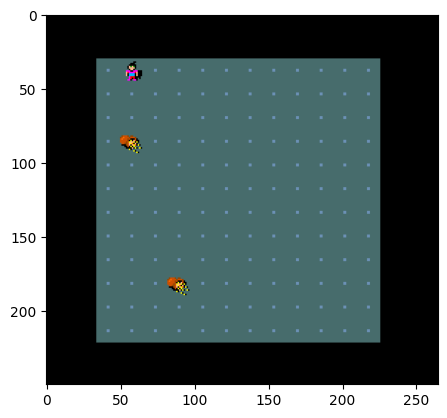

In [5]:
plt.imshow(state['pixel'][50:300, 510:775])

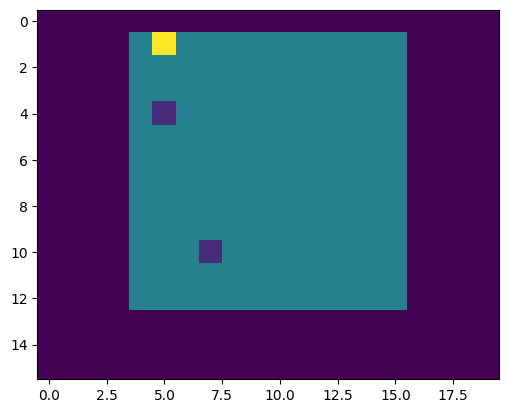

In [6]:
plt.imshow(state['chars'][4:20, 30:50])

In [7]:
game_map = state['chars']
game = state['pixel']

In [8]:
start = get_player_location(game_map)
targets = get_targets_location(game_map,symbol='$')
# Creazione delle coordinate dei vari target
coord_targets_tupla = tuple(tuple(array) for array in targets)
coord_targets_list = list(zip(*coord_targets_tupla))
coord_targets_list
print("Entity position on the map (y, x)")
print("Agent position:", start)
for y,x in coord_targets_list:
    print(f'Target postition: ({y}, {x})')

Entity position on the map (y, x)
Agent position: (5, 35)
Target postition: (8, 35)
Target postition: (14, 37)


In [9]:
# restituisce una tupla di 2 np array: il primo contiene l'indice di riga(y) il secondo contiene l'indice di colonna(x)
targets

(array([ 8, 14]), array([35, 37]))

In [10]:
# %%time
list_of_path = []
for y,x in coord_targets_list:
    print(f'start position: {start}')
    print(f'target position ({y},{x})')
    list_of_path.append(bfs(game_map,start, (y, x)))
    start = (y, x)

start position: (5, 35)
target position (8,35)
Target found!
start position: (8, 35)
target position (14,37)
Target found!


In [11]:
#path
list_of_path

[[(5, 35), (6, 35), (7, 35), (8, 35)],
 [(8, 35),
  (9, 35),
  (10, 35),
  (11, 35),
  (12, 35),
  (13, 35),
  (14, 35),
  (14, 36),
  (14, 37)]]

In [12]:
list_of_actions = []
for list in list_of_path:
    list_of_actions.append(actions_from_path(start, list))

In [13]:
# actions
list_of_actions

[[2, 2, 2], [2, 2, 2, 2, 2, 2, 1, 1]]

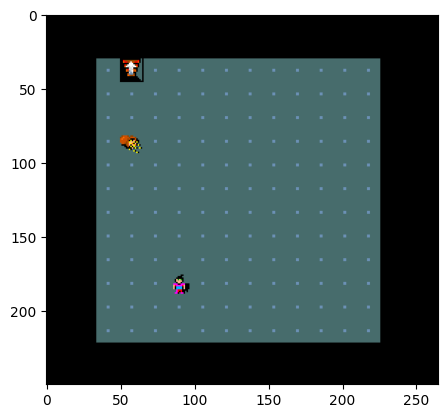

In [14]:
# env.step(action) fa muovere il personaggio.
# come parametro action è o un intero (0 -> up; 1 -> dx; 2 -> down; 3 -> sx) oppure una lista di interi
image = plt.imshow(game[50:300, 510:775])
for action in list_of_actions:
    for step in action:
        s, _, _, _ = env.step(step)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        image.set_data(s['pixel'][50:300, 510:775])